<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fashion MNIST</a></span><ul class="toc-item"><li><span><a href="#Class-label-distribution" data-toc-modified-id="Class-label-distribution-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Class label distribution</a></span></li></ul></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CIFAR-10</a></span></li></ul></li></ul></div>

# Introduction
Notebook by: Sara Giammusso.

In this notebook I analyzed the Fashion MNIST and CIFAR10 datasets available to download from: 
<ul>
    <li>https://www.kaggle.com/zalando-research/fashionmnist/data</li>
    <li>https://www.cs.toronto.edu/~kriz/cifar.html</li>
</ul>

In [74]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_color_codes()
plt.rcParams['font.family'] = 'Tahoma'
from sklearn.model_selection import train_test_split

def read_mnist(dataset='training', path='.'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    From: https://gist.github.com/akesling/5358964
    """
    import os, struct

    if dataset is 'training':
        fname_img = os.path.join(path, 'fashionmnist/train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'fashionmnist/train-labels-idx1-ubyte')
    elif dataset is 'testing':
        fname_img = os.path.join(path, 'fashionmnist/t10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'fashionmnist/t10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return list(zip(lbl, img))

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Data analysis
In this section I'm going to import and analyse the Fashion MNIST and CIFAR10 datasets.

## Fashion MNIST

Let's start with Fashion MNIST.<br>
Each training and test example is assigned to one of the following labels:

<table style="width:30%">
  <tr>
    <th>Label</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

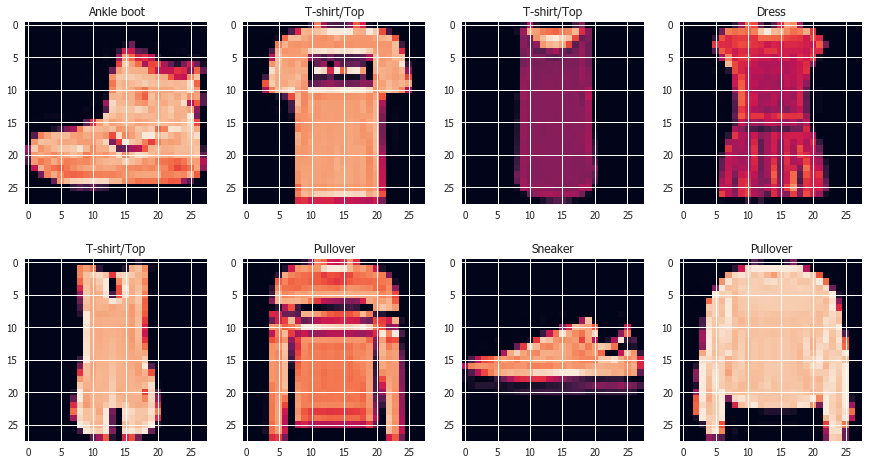

In [73]:
mnist_labels = ['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal', 'Shirt',
               'Sneaker','Bag','Ankle boot']
mnist_train = read_mnist('training')
mnist_test = read_mnist('testing')

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for ax, (label, image) in zip(axes.flat, mnist_train[:8]):
    ax.imshow(image)
    ax.set_title(mnist_labels[label])
plt.show()

In [14]:
data_train_mnist = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data_test_mnist = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

data_train_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Class label distribution

The class labels are perfectly balanced.<br>
This is true both for the training set (6000 samples per class) and for the test set (1000 samples per class).

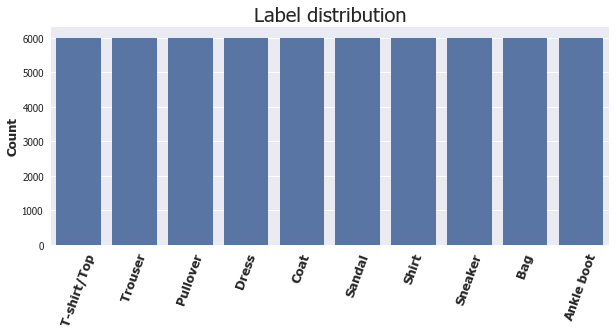

In [62]:
plt.figure(figsize=(10,4))

label_distribution = data_train_mnist['label'].value_counts()

ax = sns.barplot(x = np.array(range(10)), y = label_distribution, color='b')
ax.set_title('Label distribution',fontsize=20)
ax.set_xticklabels(mnist_labels, fontsize=13, weight='bold', rotation=70)
ax.set_ylabel('Count',fontsize=13, weight='bold')
plt.show()

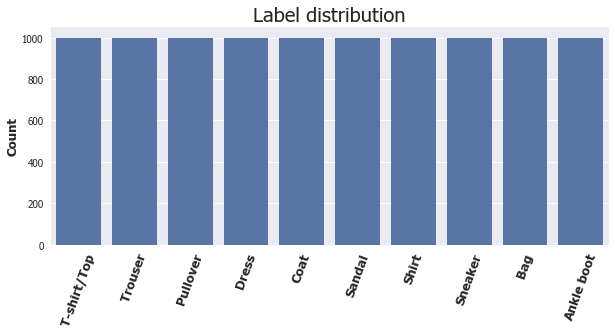

In [63]:
plt.figure(figsize=(10,4))

label_distribution = data_test_mnist['label'].value_counts()

ax = sns.barplot(x = np.array(range(10)), y = label_distribution, color='b')
ax.set_title('Label distribution',fontsize=20)
ax.set_xticklabels(mnist_labels, fontsize=13, weight='bold', rotation=70)
ax.set_ylabel('Count',fontsize=13, weight='bold')
plt.show()

In [15]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X_mnist = np.array(data_train_mnist.iloc[:, 1:])
y_mnist = np.array(data_train_mnist.iloc[:, 0])

#Here we split validation data to optimiza classifier during training
X_train_mnist, X_val_mnist, y_train_mnist, y_val_mnist = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=13)

#Test data
X_test_mnist = np.array(data_test_mnist.iloc[:, 1:])
y_test_mnist = np.array(data_test_mnist.iloc[:, 0])

X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], img_rows, img_cols, 1)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], img_rows, img_cols, 1)
X_val_mnist = X_val_mnist.reshape(X_val_mnist.shape[0], img_rows, img_cols, 1)

X_train_mnist = X_train_mnist.astype('float32')
X_test_mnist = X_test_mnist.astype('float32')
X_val_mnist = X_val_mnist.astype('float32')
X_train_mnist /= 255
X_test_mnist /= 255
X_val_mnist /= 255
print(np.shape(X_train_mnist), np.shape(X_val_mnist), np.shape(X_test_mnist))
print(np.shape(y_train_mnist), np.shape(y_val_mnist), np.shape(y_test_mnist))

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)


## CIFAR-10


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. <br>

The dataset is divided into five training batches and one test batch, each with 10000 images. <br>
The test batch contains exactly 1000 randomly-selected images from each class.<br>
The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another.<br>
Between them, the training batches contain exactly 5000 images from each class. 

In [91]:
import pickle
import os

data_path = "./cifar-10-batches-py/"

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names

def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """
    return os.path.join(data_path, filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data

def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images



def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls



def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls

In [92]:
images, cls = load_training_data()

Loading data: ./cifar-10-batches-py/data_batch_1
Loading data: ./cifar-10-batches-py/data_batch_2
Loading data: ./cifar-10-batches-py/data_batch_3
Loading data: ./cifar-10-batches-py/data_batch_4
Loading data: ./cifar-10-batches-py/data_batch_5


In [83]:
print(np.shape(images))

(50000, 32, 32, 3)


In [85]:
print(np.shape(cls))

(50000,)


In [93]:
class_names = load_class_names()
class_names

Loading data: ./cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [94]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

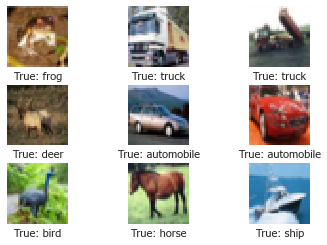

In [95]:
# Get the first images from the training-set.
images = images[0:9]

# Get the true classes for those images.
cls_true = cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)